# **FUEL CONSUMPTION RATINGS DATASET EDA (EXPLORATORY DATA ANALYSIS)** 

**IMPORTING THE REQUIRED MODULES**

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import random

**READING THE CSV FILE OF THE DATASET WITH CHANGED ENCODING BECAUSE OF MIXED ENCODINGS USED IN THIS DATASET. WITHOUT IT, IT THREW AN ERROR**

In [2]:
df = pd.read_csv('Fuel Consumption Ratings 2023.csv',encoding='latin-1')

**GETTING FIRST FEW ROWS OF THE DATASET**

In [3]:
df.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


**CHECKING FOR OUTLIERS. IT DOES'NT LOOK LIKE THERE ARE ANY.**

In [4]:
df.describe().round(1)

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.0,833.0,833.0,833.0,833.0,833.0,833.0,833.0,833.0
mean,3.1,5.6,12.4,9.4,11.0,27.4,257.5,4.5,5.2
std,1.4,2.0,3.5,2.3,2.9,7.6,64.3,1.3,1.7
min,1.2,3.0,4.4,4.4,4.4,11.0,104.0,1.0,1.0
25%,2.0,4.0,10.1,7.7,9.0,22.0,211.0,4.0,5.0
50%,3.0,6.0,12.1,9.1,10.7,26.0,254.0,5.0,5.0
75%,3.6,6.0,14.6,10.7,12.9,31.0,299.0,5.0,7.0
max,8.0,16.0,30.3,20.9,26.1,64.0,608.0,9.0,8.0


**LET'S CHECK FOR NULL, MISSING OR WRONG VALUES**

In [5]:
df.isna().sum()

Year                          15
Make                           2
Model                         23
Vehicle Class                 23
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

**APART FROM NULL VALUES, THERE ARE SOME VALUES THAT ARE CLEARLY NOT VALID YEAR VALUES**

In [6]:
df['Year'].unique()

array(['2023', nan, 'Understanding the table', 'Model', 'Transmission',
       'Fuel type', 'Fuel consumption', 'CO2 emissions', 'CO2 rating',
       'Smog rating'], dtype=object)

In [7]:
df['Year'].describe() 

count      841
unique       9
top       2023
freq       833
Name: Year, dtype: object

In [8]:
df['Year'].fillna(2023,inplace=True)

In [9]:
df['Year'].isna().sum()

0

**NEXT, THERE ARE 2 NULL VALUES IN THE SERIES - MAKE**

In [10]:
df['Make'].isna().sum()

2

In [11]:
df['Make'].describe()

count      854
unique      60
top       Ford
freq        93
Name: Make, dtype: object

In [12]:
df['Make'].fillna('Ford',inplace=True)

In [13]:
df['Make'].isna().sum()

0

**WE'LL FILL IN THE NULL VALUES OF 'VEHICLE CLASS' WITH THE TOP TWO MOST OCCURING VALUES RANDOMLY**

In [14]:
df['Vehicle Class'].isna().sum()

23

In [15]:
df['Vehicle Class'].value_counts().head()

Vehicle Class
SUV: Small                195
SUV: Standard             135
Mid-size                  112
Pickup truck: Standard     97
Subcompact                 75
Name: count, dtype: int64

In [16]:
df['Vehicle Class'].fillna(random.choice(['SUV: Small', 'SUV:Standard']),inplace=True)

In [17]:
df['Vehicle Class'].isna().sum()

0

In [18]:
df.isna().sum()

Year                           0
Make                           0
Model                         23
Vehicle Class                  0
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

**WE ARE GOING TO FILL IN THE TOP FREQUENCY VALUE IN THE NULL VALUES OF 'MODEL'**

In [19]:
df['Model'].describe()

count         833
unique        657
top       Mustang
freq            5
Name: Model, dtype: object

In [20]:
df['Model'].fillna('Sierra 4WD Mud Terrain Tire',inplace=True)

In [21]:
df['Model'].isna().sum()

0

**IN THE SERIES ENGINE SIZE (L), WE SEE THAT TWO VALUES 2.0 AND 3.0 ARE OCCURING SIGNIFICANT NUMBER OF TIMES. SO WE FILL IN THESE TWO RANDOMLY.**

In [22]:
df['Engine Size (L)'].isna().sum()

23

In [23]:
df['Engine Size (L)'].value_counts().head()

Engine Size (L)
2.0    193
3.0    124
2.5     63
3.5     46
1.5     36
Name: count, dtype: int64

In [24]:
df['Engine Size (L)'].fillna(random.choice(['2.0', '3.0']),inplace=True)

In [25]:
df['Engine Size (L)'].isna().sum()

0

In [26]:
df['Cylinders'].value_counts()

Cylinders
4.0     366
6.0     247
8.0     169
3.0      24
12.0     15
10.0      9
16.0      3
Name: count, dtype: int64

**IN 'CYLINDERS', THE MEAN VALUE IS BETWEEN 4.0 AND 6.0. ALSO, THESE ARE THE TOP TWO MOST OCCURING VALUES, SO WE'LL FILL IN THESE RANDOMLY.**

In [27]:
df['Cylinders'].mean()

5.627851140456182

In [28]:
df['Cylinders'].value_counts().head()

Cylinders
4.0     366
6.0     247
8.0     169
3.0      24
12.0     15
Name: count, dtype: int64

In [29]:
df['Cylinders'].fillna(random.choice(['4.0', '6.0']),inplace=True)

In [30]:
df['Cylinders'].isna().sum()

0

**IN TRANSMISSION SERIES OF THE DATAFRAME, WE FILLED TOP THREE MOST FREQUENT VALUES RANDOMLY IN THE NULL VALUES.**

In [31]:
df['Transmission'].value_counts().head()

Transmission
AS8     199
A8      105
AS10    102
A9       69
A10      59
Name: count, dtype: int64

In [32]:
df['Transmission'].fillna(random.choice(['AS8','A8','102']),inplace=True)

In [33]:
df['Transmission'].isna().sum()

0

In [34]:
df.isna().sum()

Year                           0
Make                           0
Model                          0
Vehicle Class                  0
Engine Size (L)                0
Cylinders                      0
Transmission                   0
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

**TOP TWO IN 'FUEL TYPE'**

In [35]:
df['Fuel Type'].value_counts()

Fuel Type
Z    408
X    390
D     20
E     15
Name: count, dtype: int64

In [36]:
df['Fuel Type'].fillna(random.choice(['Z','X']),inplace=True)

In [37]:
df['Fuel Type'].isna().sum()

0

In [38]:
df['Fuel Consumption (L/100Km)'].describe()

count    833.000000
mean      12.431453
std        3.456191
min        4.400000
25%       10.100000
50%       12.100000
75%       14.600000
max       30.300000
Name: Fuel Consumption (L/100Km), dtype: float64

In [39]:
df['Fuel Consumption (L/100Km)'].fillna(df['Fuel Consumption (L/100Km)'].mean(),inplace=True)

In [40]:
df['Fuel Consumption (L/100Km)'].isna().sum()

0

**FOR 'HWY (L/100 KM)', WE ARE GOING TO FILL IN THE NULL VALUES WITH THE MEAN**

In [41]:
df['Hwy (L/100 km)'].describe()

count    833.000000
mean       9.353661
std        2.302312
min        4.400000
25%        7.700000
50%        9.100000
75%       10.700000
max       20.900000
Name: Hwy (L/100 km), dtype: float64

In [42]:
df['Hwy (L/100 km)'].fillna(df['Hwy (L/100 km)'].mean(),inplace=True)

In [43]:
df['Hwy (L/100 km)'].isna().sum()

0

**WE ARE FILLING THE NULL VALUES OF 'COMB (L/100 KM)' WITH THE MEAN OF ITS VALUES**

In [44]:
df['Comb (L/100 km)'].unique()

array([ 7.2,  7.4,  7.8, 11.2, 12.4,  9.9, 10.3,  9.8, 11. ,  8.7,  9.2,
       11.6,  9.3,  9.6, 12.3, 11.5, 13.8, 14.6, 14. , 14.3,  7.9,  9.1,
        8.9, 10.6, 10. ,  9.5, 12. , 11.7, 13.7, 15.5, 11.4, 14.1, 15. ,
        9.7, 10.8, 13.4, 13.9,  9.4,  9. , 16.3, 13.1, 16.2, 17. , 13.6,
       16. ,  8.4,  8.6, 11.3, 12.2, 12.7, 12.6, 12.9, 10.1, 10.4, 15.7,
       13. , 10.5, 22.2, 26.1, 11.8,  8.8, 10.2, 10.7, 14.8, 15.2, 18.6,
       15.1, 14.9, 15.8, 16.7, 17.7, 13.5, 19.2, 14.5,  7.7, 15.4, 15.6,
       17.4, 15.3,  8. ,  6. , 11.9, 11.1, 16.6, 17.2, 12.1, 17.1, 13.2,
       17.6, 19.7, 13.3, 18. , 18.1,  6.4, 10.9,  7.3,  5.3,  7.1,  7.5,
        6.9,  8.3,  7.6,  6.7,  4.7,  8.2,  5. ,  8.5, 12.5, 16.5,  4.8,
        4.4,  7. ,  6.6,  6.2, 15.9, 14.7,  8.1,  6.5, 12.8, 21.7, 16.4,
       19.8,  4.9,  5.1,  6.8,  5.6,  5.7,  6.1,  nan])

In [45]:
df['Comb (L/100 km)'].describe()

count    833.000000
mean      11.047179
std        2.878308
min        4.400000
25%        9.000000
50%       10.700000
75%       12.900000
max       26.100000
Name: Comb (L/100 km), dtype: float64

In [46]:
df['Comb (L/100 km)'].fillna(df['Comb (L/100 km)'].mean(),inplace=True)

In [47]:
df['Comb (L/100 km)'].isna().sum()

0

**WE ARE FILLING THE NULL VALUES OF 'COMB (MPG)' WITH THE MEAN OF ITS VALUES**

In [48]:
df['Comb (mpg)'].describe()

count    833.000000
mean      27.375750
std        7.559968
min       11.000000
25%       22.000000
50%       26.000000
75%       31.000000
max       64.000000
Name: Comb (mpg), dtype: float64

In [49]:
df['Comb (mpg)'].fillna(df['Comb (mpg)'].mean(),inplace=True)

In [50]:
df['Comb (mpg)'].isna().sum()

0

**WE ARE FILLING THE NULL VALUES OF 'CO2 EMISSIONS (G/KM)' WITH THE MEAN OF ITS VALUES**

In [51]:
df['CO2 Emissions (g/km)'].describe()

count    833.000000
mean     257.471789
std       64.262847
min      104.000000
25%      211.000000
50%      254.000000
75%      299.000000
max      608.000000
Name: CO2 Emissions (g/km), dtype: float64

In [52]:
df['CO2 Emissions (g/km)'].fillna(df['CO2 Emissions (g/km)'].mean(),inplace=True)

In [53]:
df['CO2 Emissions (g/km)'].isna().sum()

0

**WE ARE FILLING THE NULL VALUES OF 'CO2 RATING' WITH THE MEAN OF ITS VALUES**

In [54]:
df['CO2 Rating'].describe()

count    833.000000
mean       4.522209
std        1.279385
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        9.000000
Name: CO2 Rating, dtype: float64

In [55]:
df['CO2 Rating'].fillna(df['CO2 Rating'].mean(),inplace=True)

In [56]:
df['CO2 Rating'].isna().sum()

0

**WE ARE FILLING THE NULL VALUES OF 'SMOG RATING' WITH THE MEAN OF ITS VALUES**

In [57]:
df['Smog Rating'].describe()

count    833.000000
mean       5.236495
std        1.665693
min        1.000000
25%        5.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Smog Rating, dtype: float64

In [58]:
df['Smog Rating'].fillna(df['Smog Rating'].mean(),inplace=True)

In [59]:
df['Smog Rating'].isna().sum()

0

In [60]:
df.isna().sum()

Year                          0
Make                          0
Model                         0
Vehicle Class                 0
Engine Size (L)               0
Cylinders                     0
Transmission                  0
Fuel Type                     0
Fuel Consumption (L/100Km)    0
Hwy (L/100 km)                0
Comb (L/100 km)               0
Comb (mpg)                    0
CO2 Emissions (g/km)          0
CO2 Rating                    0
Smog Rating                   0
dtype: int64

**PLOTTING A PAIRPLOT TO SEE THE CORRELATION BETWEEN 'FUEL TYPE' AND MULTIPLE OTHER PARAMETERS OF THE DATAFRAME**

In [61]:
df['Fuel Type'].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

In [62]:
df.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


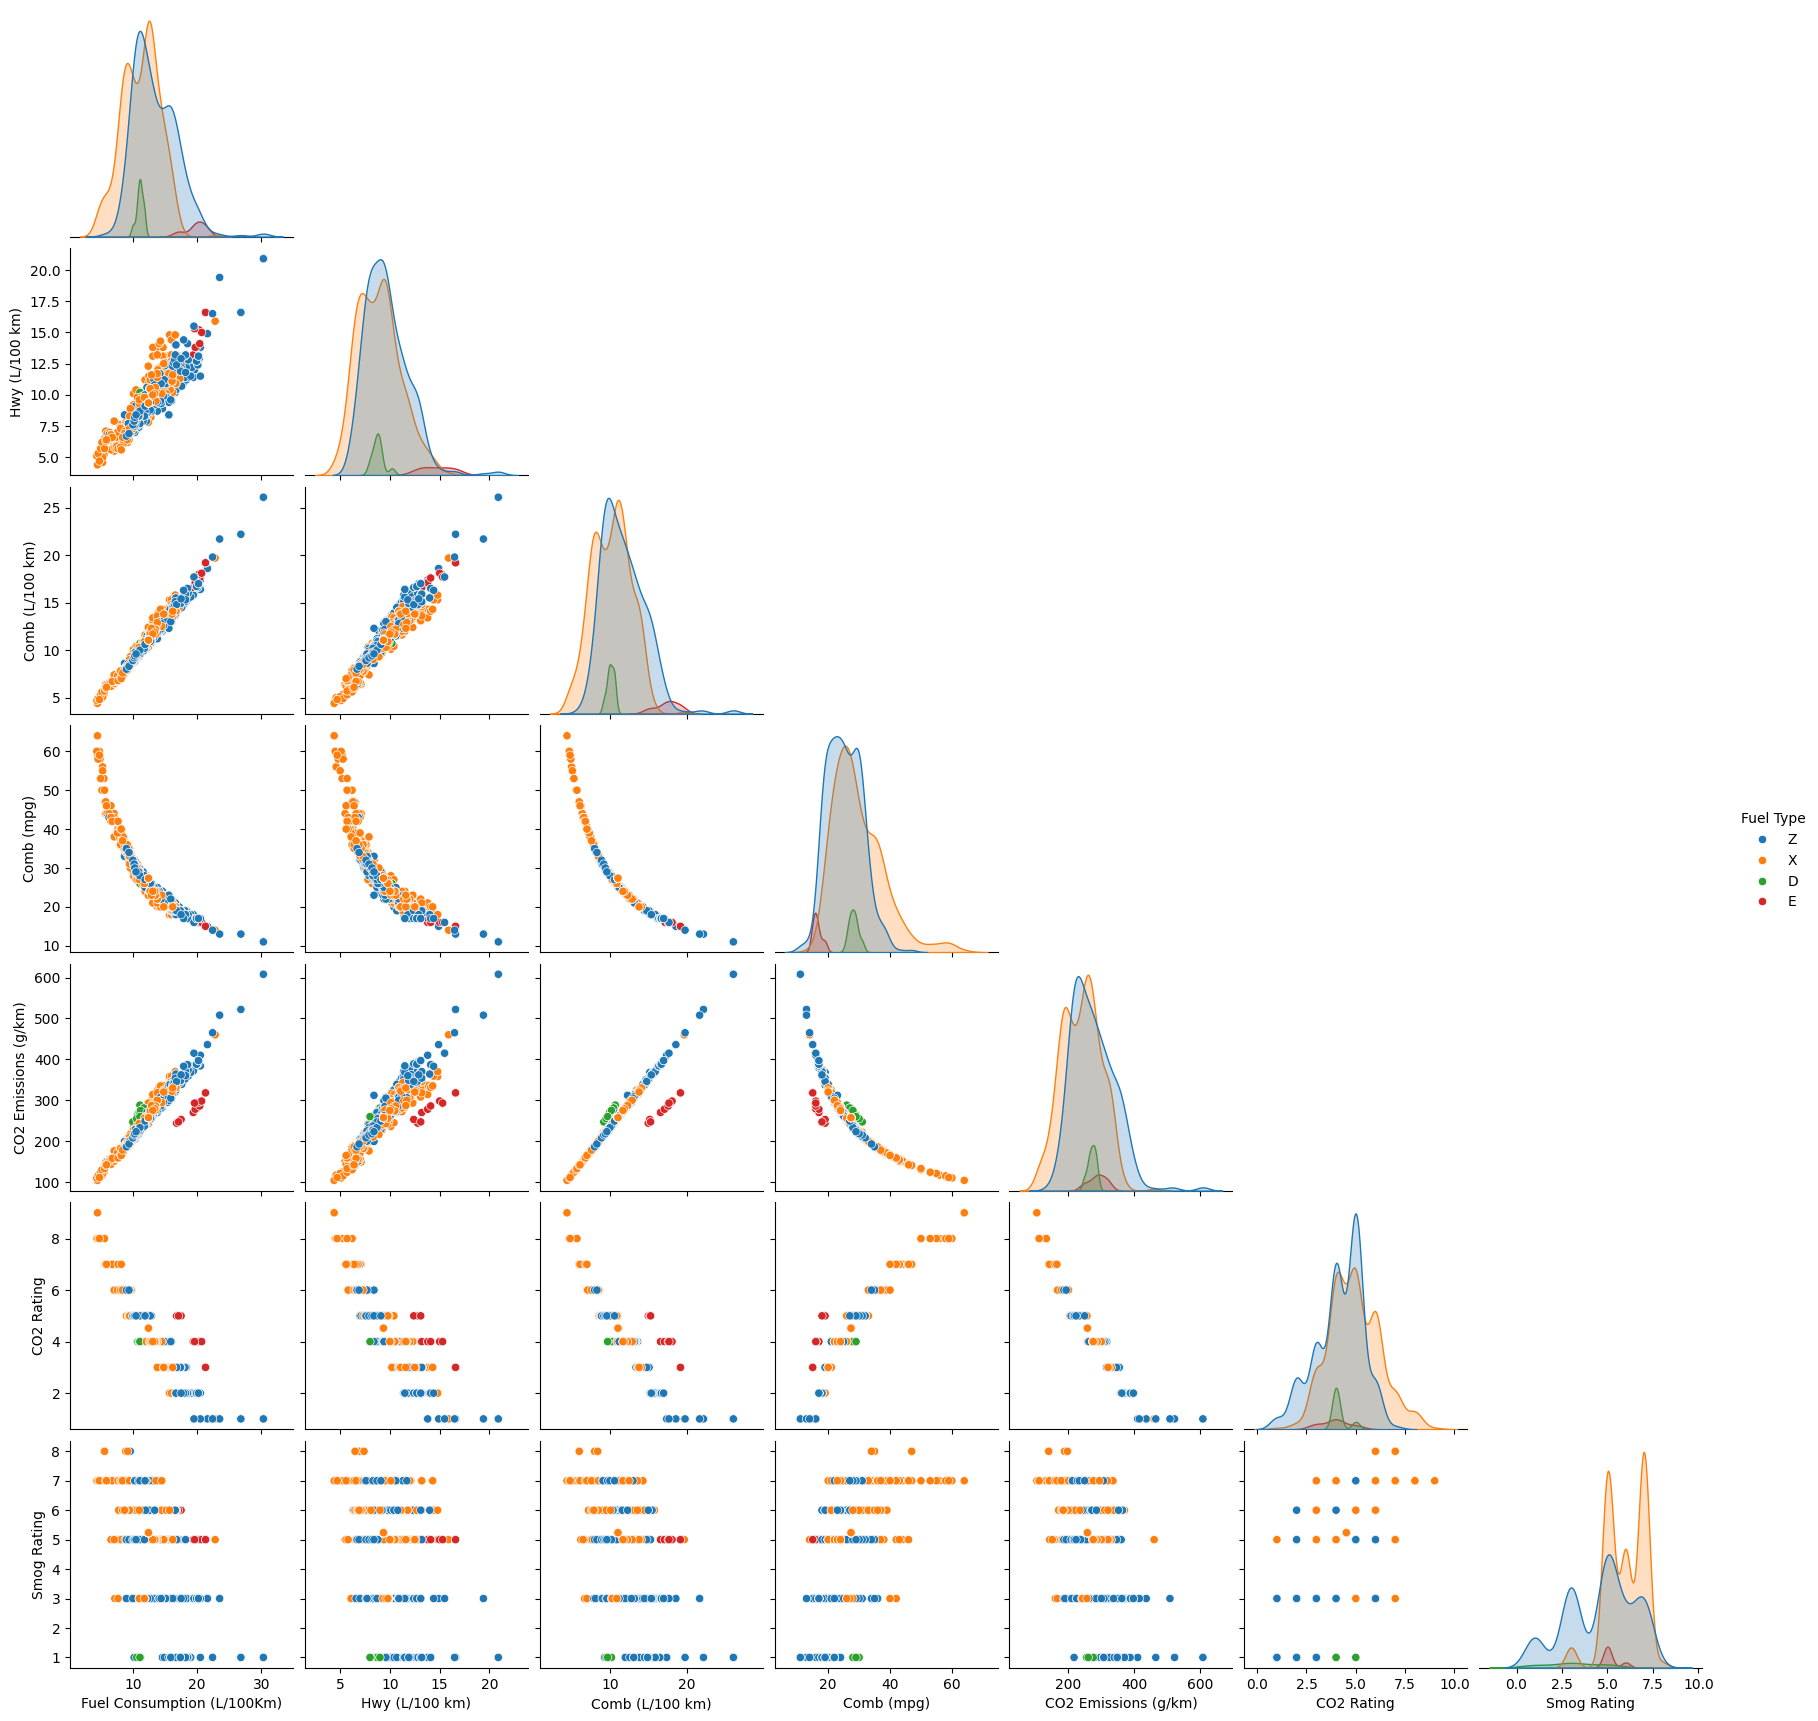

In [63]:
selected_columns = df[['Fuel Type','Engine Size (L)','Cylinders','Fuel Consumption (L/100Km)','Hwy (L/100 km)','Comb (L/100 km)','Comb (mpg)','CO2 Emissions (g/km)','CO2 Rating','Smog Rating']]
sn.pairplot(selected_columns, corner=True, hue='Fuel Type')
plt.show()

**PLOTTING A PAIRPLOT TO SEE THE CORRELATION BETWEEN 'TRANSMISSION' AND MULTIPLE OTHER PARAMETERS OF THE DATAFRAME**

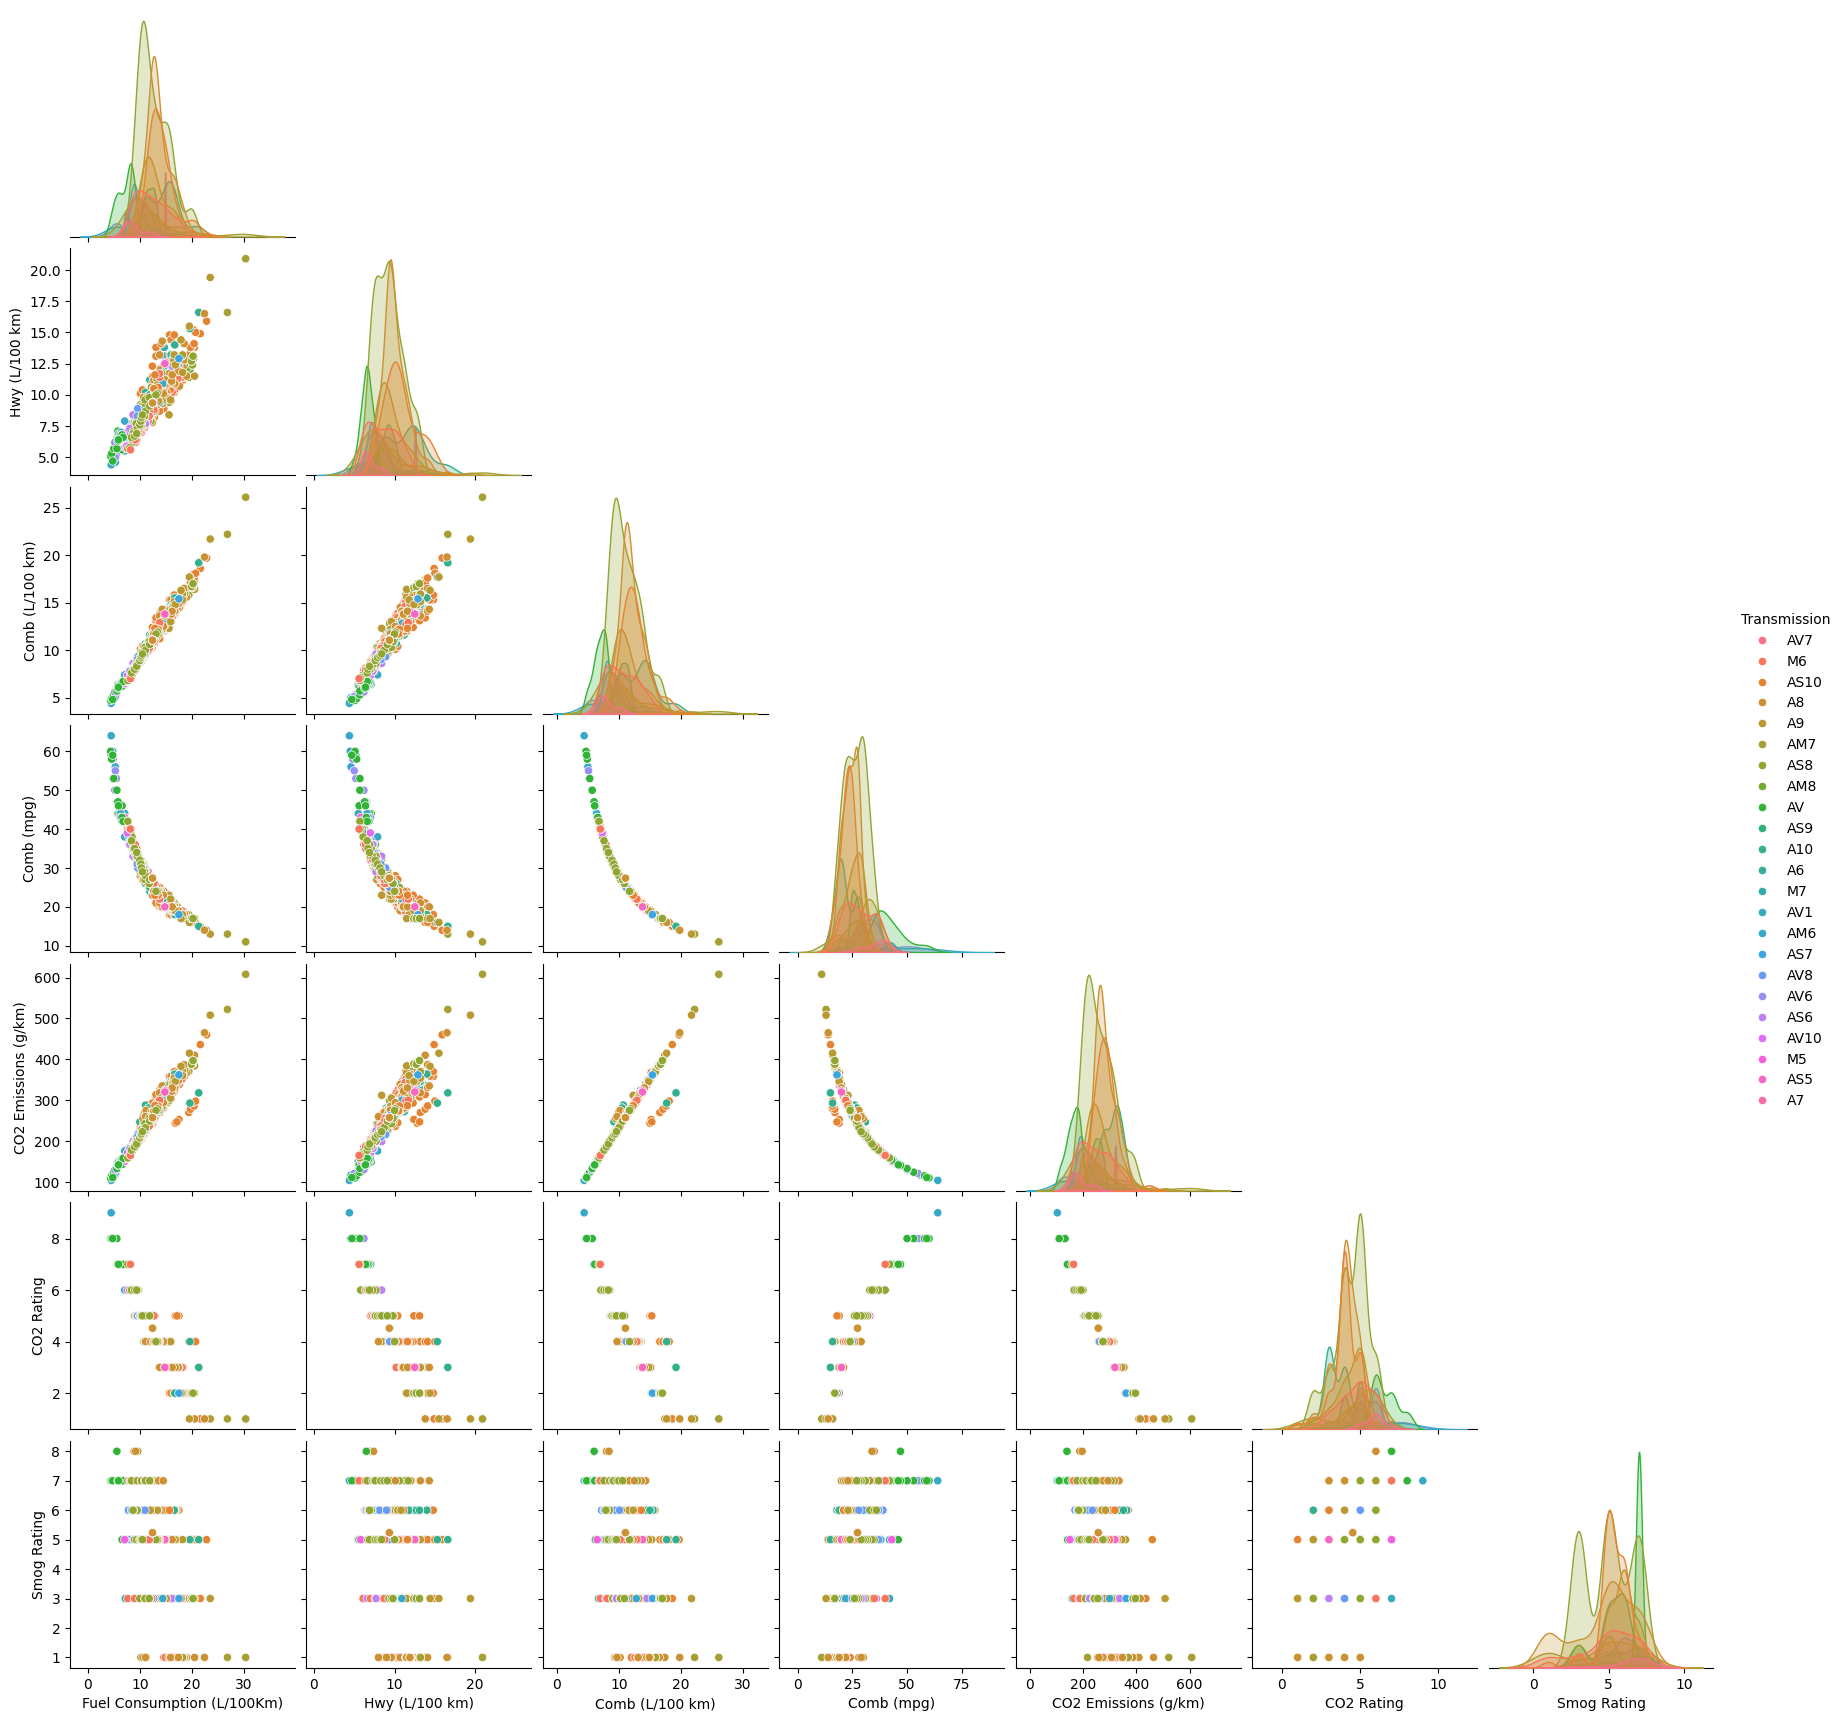

In [64]:
selected_columns = df[['Transmission','Engine Size (L)','Cylinders','Fuel Consumption (L/100Km)','Hwy (L/100 km)','Comb (L/100 km)','Comb (mpg)','CO2 Emissions (g/km)','CO2 Rating','Smog Rating']]
sn.pairplot(selected_columns, corner=True, hue='Transmission')
plt.show()

 **WE'RE PLOTTING A GRAPH BETWEEN 'CYLINDERS' AND 'CO2 EMISSIONS (G/KM)'**

<Axes: xlabel='Cylinders'>

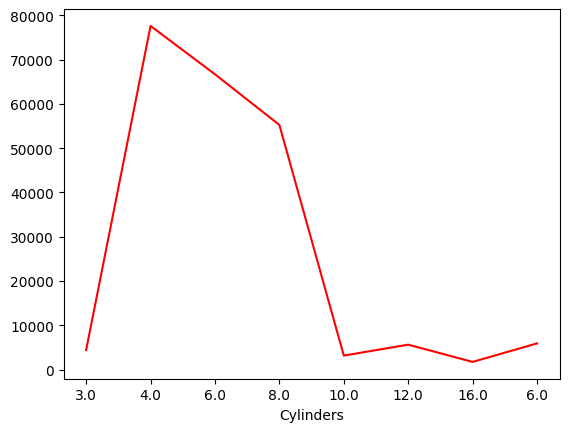

In [79]:
df.groupby('Cylinders')['CO2 Emissions (g/km)'].sum().plot(kind="line", color='red')

 **WE'RE PLOTTING A GRAPH BETWEEN 'CYLINDERS' AND 'CO2 RATING'**

<Axes: xlabel='Cylinders'>

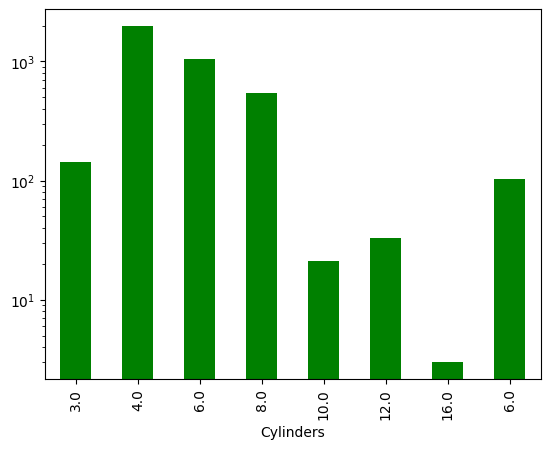

In [77]:
df.groupby('Cylinders')['CO2 Rating'].sum().plot(kind="bar", logy=True, color='green')

 **WE'RE PLOTTING A GRAPH BETWEEN 'CYLINDERS' AND 'SMOG RATING'**

<Axes: ylabel='Cylinders'>

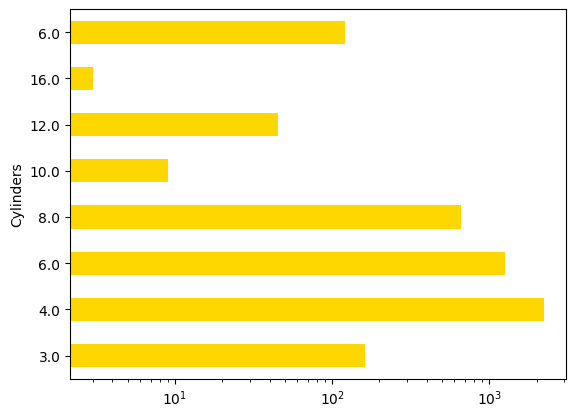

In [76]:
df.groupby('Cylinders')['Smog Rating'].sum().plot(kind="barh", logx=True, color='gold')